In [1]:
import setup; import matplotlib.pyplot as plt; import numpy as np; import pandas as pd
from speech_pause_indicator import speech as original_speech
from dtw import dtw ; import librosa.display ; import librosa ; from numba import jit
import scipy.spatial

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
a = [0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0]
c = [0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 1.5, 1.5, 0, 0, 0, 0]

print(len(a))

16


# 1 and 2

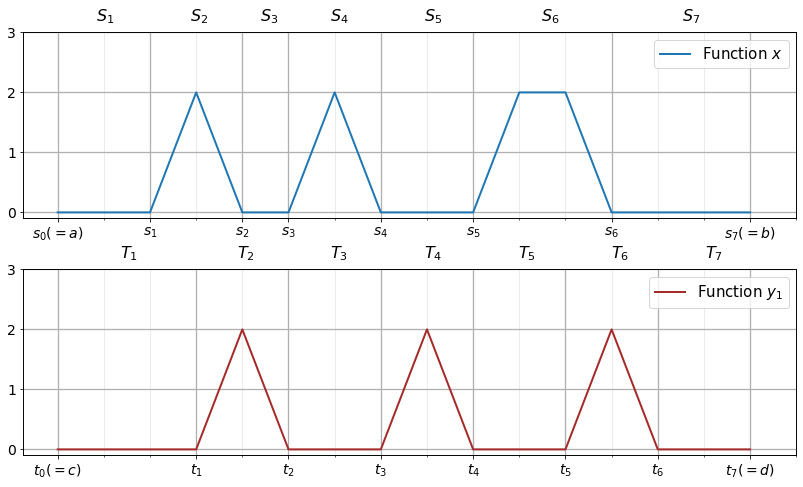

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1);
fig.set_size_inches(12, 7)   
fig.tight_layout(pad=3.0)

positions = np.arange(16)
minor_ticks=np.linspace(0,16,17)
major_alpha = 1
minor_alpha = 0.3
major_linewidth = 1.3
##############################

a = [0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0]
# labels1 = ['$s_' + str(p) + '$' for p in positions]
labels1 = ['$s_0 (=a)$', '$s_1$', '$s_2$', '$s_3$', '$s_4$', '$s_5$', '$s_6$', '$s_7(=b)$']

ax1.plot(positions, a, linewidth=2, label = 'Function $x$')
ax1.set_xticks([0, 2, 4, 5, 7, 9, 12, 15]) 
ax1.set_xticklabels(labels1, fontsize = '14');
ax1.set_yticks([0, 1, 2, 3]) 
ax1.set_yticklabels([0, 1, 2, 3], fontsize = '14'); ax1.grid(True)

labels1 = ['$S_' + str(p) + '$' for p in positions]
ax = ax1.twiny()
ax.set_xticks([1, 3, 4.5, 6, 8, 10.5, 13.5])
ax.set_xbound(ax1.get_xbound())
ax.set_xticklabels(labels1[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 

ax1.set_xticks(minor_ticks,minor=True)
ax1.grid(which="minor", alpha = minor_alpha)
ax1.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)
ax1.legend(fontsize = 15);
##############################

b = [0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0]
ax2.plot(positions, b, linewidth=2, label = 'Function $y_1$', color = 'brown')
# labels2 = ['$t_' + str(p) + '$' for p in positions]

labels2 = ['$t_0 (=c)$', '$t_1$', '$t_2$', '$t_3$', '$t_4$', '$t_5$', '$t_6$', '$t_7(=d)$']
ax2.set_xticks([0, 3, 5, 7, 9, 11, 13, 15]) 
ax2.set_xticklabels(labels2, fontsize = '14');

ax2.set_yticks([0, 1, 2, 3]) 
ax2.set_yticklabels([0, 1, 2, 3], fontsize = '14'); ax2.grid(True)

labels2 = ['$T_' + str(p) + '$' for p in positions]
ax = ax2.twiny()
ax.set_xticks([1.5, 4, 6, 8, 10, 12, 14])
ax.set_xbound(ax2.get_xbound())
ax.set_xticklabels(labels2[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 


ax2.set_xticks(minor_ticks,minor=True)
ax2.grid(which="minor", alpha = minor_alpha)
ax2.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)
ax2.legend(fontsize = 15);

plt.savefig('/Users/ninismacbook/desktop/xy.png', dpi=500)

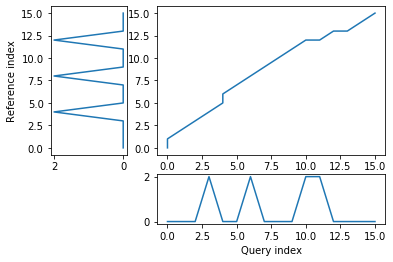

distance:  0.0


In [4]:
alignment = dtw(a, b, keep_internals=True)
alignment.plot("threeway")
print('distance: ', alignment.distance)

## Align 1 and 3

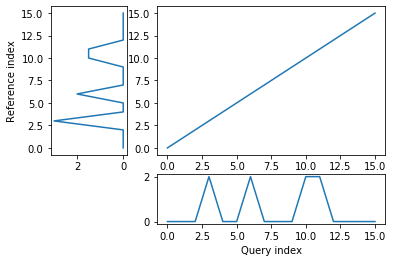

distance:  4.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
0 0 0
1 1 0
2 2 0
3 3 1
4 4 0
5 5 0
6 6 0
7 7 0
8 8 0
9 9 0
10 10 0.5
11 11 0.5
12 12 0
13 13 0
14 14 0
15 15 0


In [5]:
alignment = dtw(a, c, keep_internals=True)
alignment.plot("threeway")
print('distance: ', alignment.distance)
print(alignment.index1)
print(alignment.index2)
for i in range(len(alignment.index1)):
    print(alignment.index1[i], alignment.index2[i], np.abs(a[alignment.index1[i]]-c[alignment.index2[i]]))

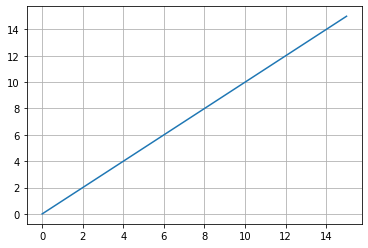

In [6]:
plt.plot(alignment.index1, alignment.index2)
plt.grid()

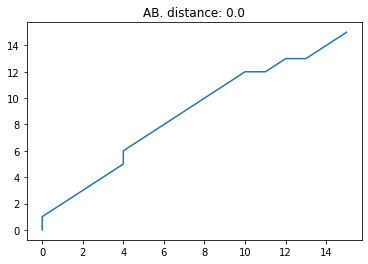

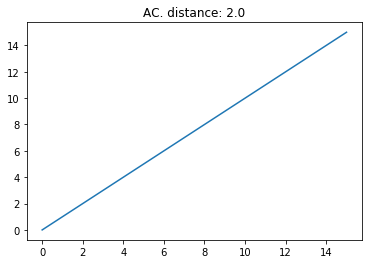

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (cost_matrix, accumulated_cost_matrix,
                              _return_path, _blurred_path_region)

dtw_classic, path_classic = dtw(a, b, dist = 'absolute',
                                method='classic', return_path=True)
plt.plot(path_classic[0], path_classic[1])
plt.title('AB. distance: ' + str(dtw_classic))

plt.subplots(1, 1)
dtw_classic, path_classic = dtw(a, c, dist = 'absolute',
                                method='classic', return_path=True)
plt.plot(path_classic[0], path_classic[1])
plt.title('AC. distance: '+ str(dtw_classic));

<font size="8" color="#6AA84F"> $\varphi_{\frac{0}{7}} \;\; \varphi_{\frac{1}{7}} \;\; \varphi_{\frac{2}{7}} \;\; \varphi_{\frac{3}{7}} \;\; \varphi_{\frac{4}{7}} \;\; \varphi_{\frac{5}{7}} \;\; \varphi_{\frac{6}{7}} \;\;\varphi_{\frac{7}{7}}$</font>

<font size="8" color="orange"> $ C_0 \;\; C_1 \;\; C_2 \;\; C_3 \;\; C_4 \;\; C_5 \;\; C_6 \;\;C_7 $  </font>

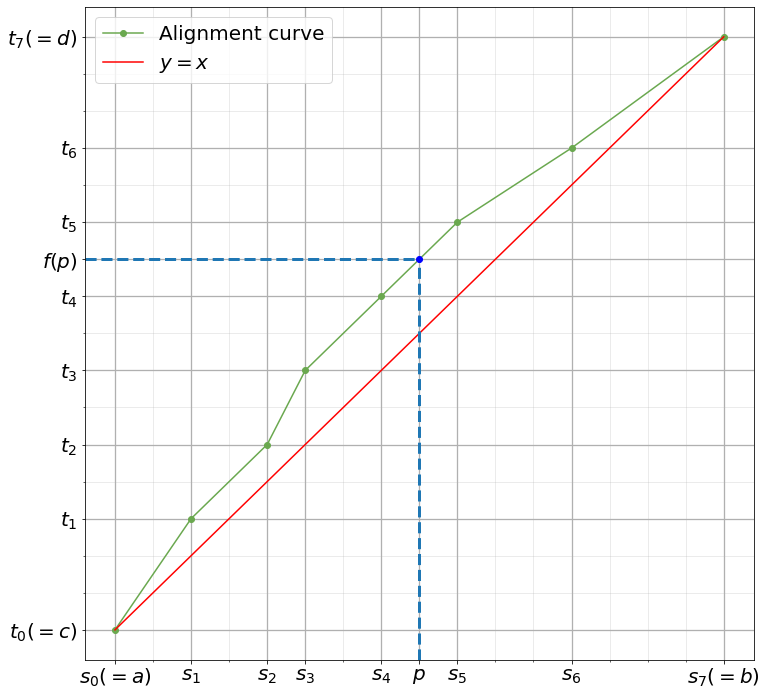

In [13]:
fig, ax3 = plt.subplots(1, 1);
fig.set_size_inches(12, 12)

positions = np.arange(17)
fontsize = '20'

labels1 = ['$s_0 (=a)$', '$s_1$', '$s_2$', '$s_3$', '$s_4$', '$p$', '$s_5$', '$s_6$', '$s_7(=b)$']
labels2 = ['$t_0 (=c)$', '$t_1$', '$t_2$', '$t_3$', '$t_4$', '$f(p)$', '$t_5$', '$t_6$', '$t_7(=d)$']

x = [0, 2, 4, 5, 7, 9, 12, 16]
y = [0, 3, 5, 7, 9, 11, 13, 16]
plt.plot(x, y, marker='o', color="#6AA84F", label = 'Alignment curve')
plt.plot(positions, positions, color="red", label = '$y=x$')

ax3.set_xticks([0, 2, 4, 5, 7, 8, 9, 12, 16]) 
ax3.set_xticklabels(labels1, fontsize = fontsize); 
ax3.set_yticks([0, 3, 5, 7, 9, 10, 11, 13, 16]) 
ax3.set_yticklabels(labels2, fontsize = fontsize);
    
ax3.set_xticks(minor_ticks,minor=True)
ax3.set_yticks(minor_ticks,minor=True)

ax3.grid(which="minor", alpha = minor_alpha)
ax3.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)

ax3.axvline(x=8, ymax = 0.61, linestyle = '--', linewidth = 3) 
ax3.axhline(y=10, xmax = 0.5, linestyle = '--', linewidth = 3)
plt.plot(8, 10,'ro', color = 'blue') 

plt.legend(fontsize = fontsize)
plt.savefig('/Users/ninismacbook/desktop/example-alignment.png', dpi=500)

# 1 and 3

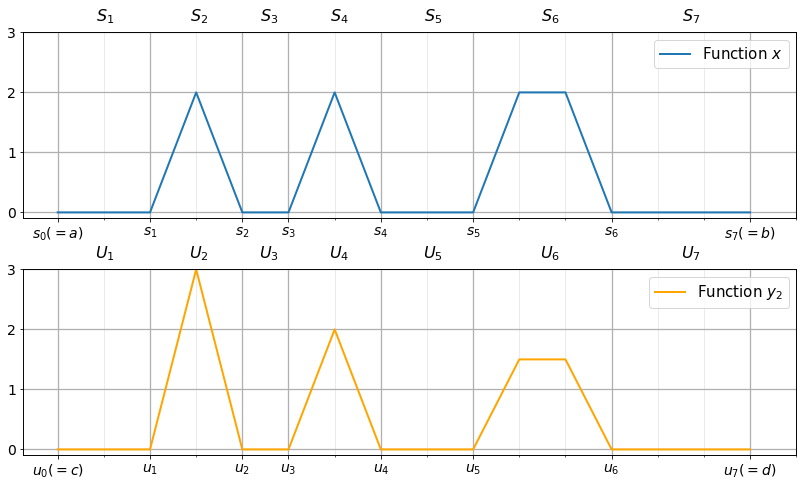

In [10]:
fig, (ax1, ax3) = plt.subplots(2, 1);
fig.set_size_inches(12, 7)   
fig.tight_layout(pad=3.0)

positions = np.arange(16)
minor_ticks=np.linspace(0,16,17)
major_alpha = 1
minor_alpha = 0.3
major_linewidth = 1.3
##############################

a = [0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0]
# labels1 = ['$s_' + str(p) + '$' for p in positions]
labels1 = ['$s_0 (=a)$', '$s_1$', '$s_2$', '$s_3$', '$s_4$', '$s_5$', '$s_6$', '$s_7(=b)$']

# ax1.set_title('Function $x$',fontweight="bold", size=18) # Title
ax1.plot(positions, a, linewidth=2, label = 'Function $x$')
ax1.set_xticks([0, 2, 4, 5, 7, 9, 12, 15]) 
ax1.set_xticklabels(labels1, fontsize = '14');
ax1.set_yticks([0, 1, 2, 3]) 
ax1.set_yticklabels([0, 1, 2, 3], fontsize = '14'); ax1.grid(True)

labels1 = ['$S_' + str(p) + '$' for p in positions]
ax = ax1.twiny()
ax.set_xticks([1, 3, 4.5, 6, 8, 10.5, 13.5])
ax.set_xbound(ax1.get_xbound())
ax.set_xticklabels(labels1[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 

ax1.set_xticks(minor_ticks,minor=True)
ax1.grid(which="minor", alpha = minor_alpha)
ax1.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)
ax1.legend(fontsize = 15);

##############################

c = [0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 1.5, 1.5, 0, 0, 0, 0]

ax3.plot(positions, c, linewidth=2, color = 'orange', label = 'Function $y_2$')

labels3 = ['$u_0 (=c)$', '$u_1$', '$u_2$', '$u_3$', '$u_4$','$u_5$', '$u_6$', '$u_7(=d)$']
ax3.set_xticks([0, 2, 4, 5, 7, 9, 12, 15]) 
ax3.set_xticklabels(labels3, fontsize = '14'); 
ax3.set_yticks([0, 1, 2, 3]) 
ax3.set_yticklabels([0, 1, 2, 3], fontsize = '14');

labels3 = ['$U_' + str(p) + '$' for p in positions]
ax = ax3.twiny()
ax.set_xticks([1, 3, 4.5, 6, 8, 10.5, 13.5])
ax.set_xbound(ax3.get_xbound())
ax.set_xticklabels(labels3[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 


ax3.set_xticks(minor_ticks,minor=True)
ax3.grid(which="minor", alpha = minor_alpha)
ax3.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)
ax3.set_ylim(-.1, 3)
ax3.legend(fontsize = 15);

plt.savefig('/Users/ninismacbook/desktop/why-is-d-necessary-original.png', dpi=500)

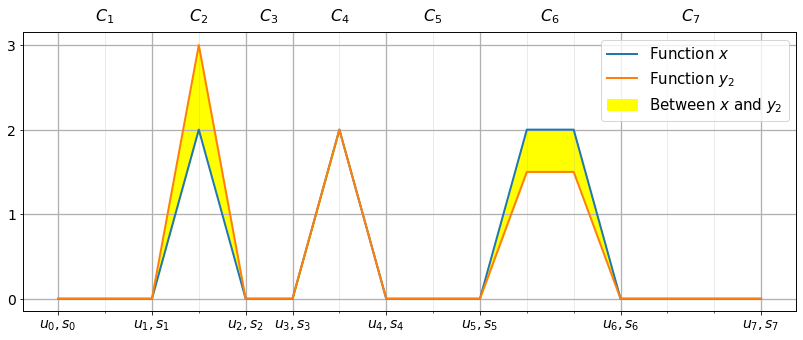

In [11]:
fig, (ax1) = plt.subplots(1, 1);
fig.set_size_inches(12, 5)   
fig.tight_layout(pad=3.0)

positions = np.arange(16)
minor_ticks=np.linspace(0,16,17)
major_alpha = 1
minor_alpha = 0.3
major_linewidth = 1.3
##############################

a = [0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0]
# labels1 = ['$s_' + str(p) + '$' for p in positions]
ax1.plot(positions, a, linewidth=2, label = 'Function $x$')
ax1.set_xticks([0, 2, 4, 5, 7, 9, 12, 15]) 
ax1.set_xticklabels(labels1, fontsize = '14');
ax1.set_yticks([0, 1, 2, 3]) 
ax1.set_yticklabels([0, 1, 2, 3], fontsize = '14'); ax1.grid(True)

labels1 = ['$C_' + str(p) + '$' for p in positions]
ax = ax1.twiny()
ax.set_xticks([1, 3, 4.5, 6, 8, 10.5, 13.5])
ax.set_xbound(ax1.get_xbound())
ax.set_xticklabels(labels1[1:8], fontsize = '16')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    top=False)         # ticks along the top edge are off 

ax1.set_xticks(minor_ticks,minor=True)
ax1.grid(which="minor", alpha = minor_alpha)
ax1.grid(which="major", alpha = major_alpha, linewidth=major_linewidth)

##############################
# positions = np.arange(17)
c = [0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 1.5, 1.5, 0, 0, 0, 0]
ax1.plot(positions, c, linewidth=2, label = 'Function $y_2$')

labels3 = ['$u_' + str(p) + ', s_' + str(p) + '$' for p in positions]
ax1.set_xticklabels(labels3, fontsize = '14'); 

ax1.fill_between(positions, a, c, color = 'yellow', label = 'Between $x$ and $y_2$')
ax1.legend(fontsize = 15);
plt.savefig('/Users/ninismacbook/desktop/d.png', dpi=500)

# simple example of dtw

In [12]:
x = [0, 0, 1, 0]
y = [0, 1, 0]
print('x =', x)
print('y =', y)

def compute_cost_matrix(X, Y, metric='euclidean'):
    """Compute the cost matrix of two feature sequences

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        X: Sequence 1
        Y: Sequence 2
        metric: Cost metric, a valid strings for scipy.spatial.distance.cdist

    Returns:
        C: Cost matrix
    """
    X, Y = np.atleast_2d(X, Y)
    C = scipy.spatial.distance.cdist(X.T, Y.T, metric=metric)
    return C



C =  compute_cost_matrix(x, y, metric='euclidean')
print('Cost matrix =', C, sep='\n')

@jit(nopython=True)
def compute_accumulated_cost_matrix(C):
    """Compute the accumulated cost matrix given the cost matrix
    Args:        C: cost matrix
    Returns      D: Accumulated cost matrix
    """
    N = C.shape[0]
    M = C.shape[1]
    D = np.zeros((N, M))
    D[0, 0] = C[0, 0]
    for n in range(1, N):
        D[n, 0] = D[n-1, 0] + C[n, 0]
    for m in range(1, M):
        D[0, m] = D[0, m-1] + C[0, m]
    for n in range(1, N):
        for m in range(1, M):
            D[n, m] = C[n, m] + min(D[n-1, m], D[n, m-1], D[n-1, m-1])
    return D

D =  compute_accumulated_cost_matrix(C)
print('\nAccumulated cost matrix D =\n', D, sep='\n')
print('\nDTW distance =', D[-1, -1])

path = []
alignment = dtw(x, y, keep_internals=True)
alignment.plot("threeway")

for i in range(len(alignment.index1)):
    path.append((alignment.index1[i], alignment.index2[i]))
    
path_toprint = [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12), (11, 12), (12, 13), (13, 13), (14, 14), (15, 15)]

# if path != path_toprint:
#     print('Something is wrong')
# print('\nOptimal Alignment Path = [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4),\n(4, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12),\n(11, 12), (12, 13), (13, 13), (14, 14), (15, 15)]')
print(path)

x = [0, 0, 1, 0]
y = [0, 1, 0]
Cost matrix =
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]

Accumulated cost matrix D =

[[0. 1. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

DTW distance = 0.0


TypeError: dtw() got an unexpected keyword argument 'keep_internals'

In [ ]:
x = [0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0]
y = [0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0]

print('x =', x)
print('y =', y)

def compute_cost_matrix(X, Y, metric='euclidean'):
    """Compute the cost matrix of two feature sequences

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        X: Sequence 1
        Y: Sequence 2
        metric: Cost metric, a valid strings for scipy.spatial.distance.cdist

    Returns:
        C: Cost matrix
    """
    X, Y = np.atleast_2d(X, Y)
    C = scipy.spatial.distance.cdist(X.T, Y.T, metric=metric)
    return C



C =  compute_cost_matrix(x, y, metric='euclidean')
# print('Cost matrix =', C, sep='\n')

@jit(nopython=True)
def compute_accumulated_cost_matrix(C):
    """Compute the accumulated cost matrix given the cost matrix
    Args:        C: cost matrix
    Returns      D: Accumulated cost matrix
    """
    N = C.shape[0]
    M = C.shape[1]
    D = np.zeros((N, M))
    D[0, 0] = C[0, 0]
    for n in range(1, N):
        D[n, 0] = D[n-1, 0] + C[n, 0]
    for m in range(1, M):
        D[0, m] = D[0, m-1] + C[0, m]
    for n in range(1, N):
        for m in range(1, M):
            D[n, m] = C[n, m] + min(D[n-1, m], D[n, m-1], D[n-1, m-1])
    return D

D =  compute_accumulated_cost_matrix(C)
print('\nAccumulated cost matrix D =\n', D, sep='\n')
path = []
alignment = dtw(x, y, keep_internals=True)
# alignment.plot("threeway")

for i in range(len(alignment.index1)):
    path.append((alignment.index1[i], alignment.index2[i]))
    
# path_toprint = [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12), (11, 12), (12, 13), (13, 13), (14, 14), (15, 15)]

# if path != path_toprint:
#     print('Something is wrong')
print('\nOptimal Alignment Path = [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4),\n(4, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12),\n(11, 12), (12, 13), (13, 13), (14, 14), (15, 15)]')
# print('\nOptimal Alignment Path = ', path)
print('\nDTW distance =', D[-1, -1])

In [ ]:
path = []
alignment = dtw(x, y, keep_internals=True)
alignment.plot("threeway")

for i in range(len(alignment.index1)):
    path.append((alignment.index1[i], alignment.index2[i]))
    
# path_toprint = [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12), (11, 12), (12, 13), (13, 13), (14, 14), (15, 15)]

# if path != path_toprint:
#     print('Something is wrong')
# print('\nOptimal Alignment Path = [(0, 0), (0, 1), (1, 2), (2, 3), (3, 4),\n(4, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12),\n(11, 12), (12, 13), (13, 13), (14, 14), (15, 15)]')
print(path)

# alignment = dtw(x, y, keep_internals = True)
print(alignment.stepPattern)
print(alignment.costMatrix)
# print(alignment.index1, alignment.index2)

# class dtw
https://dynamictimewarping.github.io/py-api/html/api/dtw.D_T_W_.html

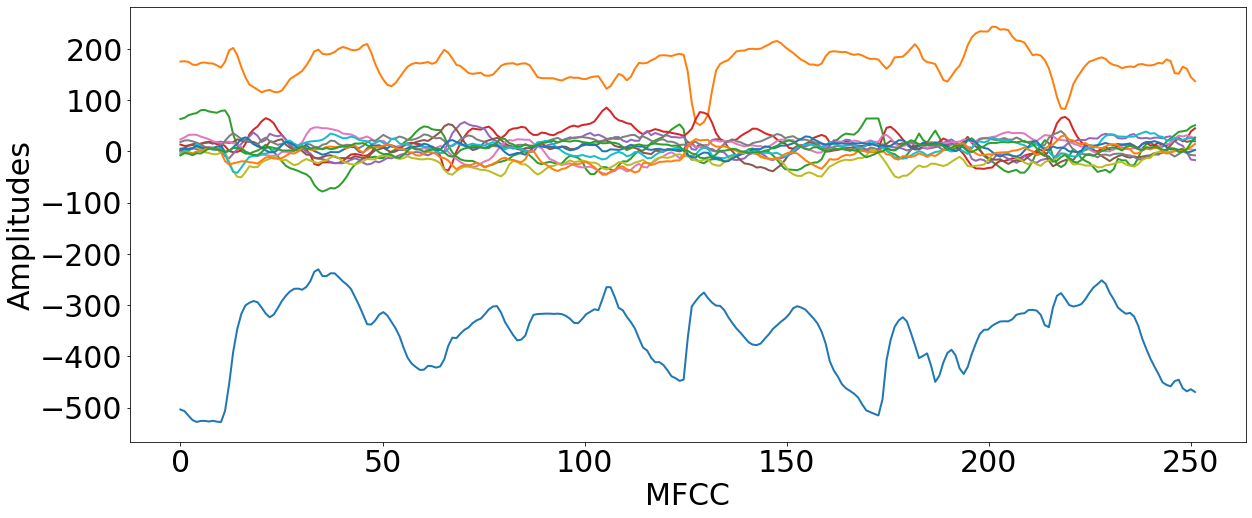

In [16]:
capstone_dir = "/Users/ninismacbook/other_docs/Y4S1+S2/capstone" 
file1, seg1_1, seg1_2 = "report-normal1.wav", 1.5, 4

fontsize = '30'

x, sr1 = librosa.load(capstone_dir + "/py_converted/" + file1, sr=None)
num_of_mfcc = 13
hop_len_in_s = 0.01

fragment_x = x[int(sr1*seg1_1): int(sr1*seg1_2)]

mfcc1_normal = librosa.feature.mfcc(fragment_x, sr1, n_mfcc=num_of_mfcc, hop_length=int(hop_len_in_s*sr1))
time1 = np.linspace(0, mfcc1_normal.shape[1], num = mfcc1_normal.shape[1])   


plt.figure(figsize=(20,8))

plt.tight_layout(pad=3.0)
for i in mfcc1_normal:
    plt.plot(time1, i, linewidth = 2);   
plt.xticks(fontsize = fontsize);
plt.yticks(fontsize = fontsize);
plt.xlabel('MFCC', fontsize = fontsize);
plt.ylabel('Amplitudes', fontsize = fontsize)
plt.savefig('/Users/ninismacbook/desktop/mfcc.png', dpi=300)    